In [26]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [27]:
internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines = False)

C:\Users\chern\AppData\Local\Temp\ipykernel_37756\3044409284.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines = False)
b'Skipping line 4675: expected 4 fields, saw 6\n'


In [28]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines = 'skip')

In [29]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4670,175,Includes individuals 3 years and older,NaN,NaN
4671,176,NTIA/CPS survey.,NaN,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4673,179,Preliminary. Country estimate.,NaN,NaN


In [30]:
type(internet_df)

pandas.core.frame.DataFrame

In [31]:
 (internet_df.dtypes)

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [32]:
internet_demo = internet_df.drop(columns = ['Value Footnotes'])

In [33]:
internet_demo

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4670,175,Includes individuals 3 years and older,NaN
4671,176,NTIA/CPS survey.,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN
4673,179,Preliminary. Country estimate.,NaN


In [34]:
internet_demo.columns = ['Country', 'Year', 'Internet_User_Pct']

In [35]:
internet_demo

,Country,Year,Internet_User_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4670,175,Includes individuals 3 years and older,NaN
4671,176,NTIA/CPS survey.,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN
4673,179,Preliminary. Country estimate.,NaN


16. Look at the number of observations in this dataset per year. What do you notice? see below 
Yes, there is still details regarding the footnote that is lingering. We will need to remove this in order to properly 
assess the dataframe.

In [36]:
internet_demo.shape

(4675, 3)

In [39]:
n=180
internet_demo = internet_demo.iloc[:-n]

In [40]:
internet_demo

,Country,Year,Internet_User_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4310,Uruguay,2006,29.400000
4311,Uruguay,2005,20.088190
4312,Uruguay,2004,17.063098
4313,Uruguay,2003,15.937137


17. What is the first year to have a non-zero internet users percentage value? 1990 was the first year of non-zero internet users pct values.

In [41]:
min_year = internet_demo['Year'].max()

In [42]:
min_year

'2014'

In [46]:
first_usage = all_years[(all_years.Internet_User_Pct > 0) | (all_years.Year == min_year)]

In [47]:
first_usage.sort_values('Year').head(20) #1990 was the first year of non-zero internet users pct values.

,Country,Year,Internet_User_Pct
1388,Finland,1990,0.401088
1107,Denmark,1990,0.097277
2023,Israel,1990,0.110774
229,Austria,1990,0.130369
3874,Switzerland,1990,0.595714
204,Australia,1990,0.585095
375,Belgium,1990,0.001007
2048,Italy,1990,0.017545
1535,Germany,1990,0.125892
3720,Spain,1990,0.012874


18. How does the distribution of internet users percent differ for 2000 and 2014?

In [48]:
is_2000 =  internet_demo['Year'] == '2000'

In [49]:
is_2014 =  internet_demo['Year'] == '2014'

In [50]:
internet_demo[is_2000 | is_2014]

,Country,Year,Internet_User_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4252,United Kingdom,2014,91.610000
4266,United Kingdom,2000,26.821754
4277,United States,2014,87.360000
4291,United States,2000,43.079163


In [51]:
zerofourteen_years = internet_demo[is_2000 | is_2014]

In [57]:
zero_years=internet_demo[is_2000]

In [58]:
fourteen_years=internet_demo[is_2014]

In [52]:
zerofourteen_years.describe()

,Internet_User_Pct
count,384.000000
mean,27.604352
std,29.606548
min,0.000000
25%,2.100000
50%,14.453962
75%,48.824621
max,98.160000


In [53]:
zerofourteen_years

,Country,Year,Internet_User_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4252,United Kingdom,2014,91.610000
4266,United Kingdom,2000,26.821754
4277,United States,2014,87.360000
4291,United States,2000,43.079163


TypeError: title() missing 1 required positional argument: 'label'

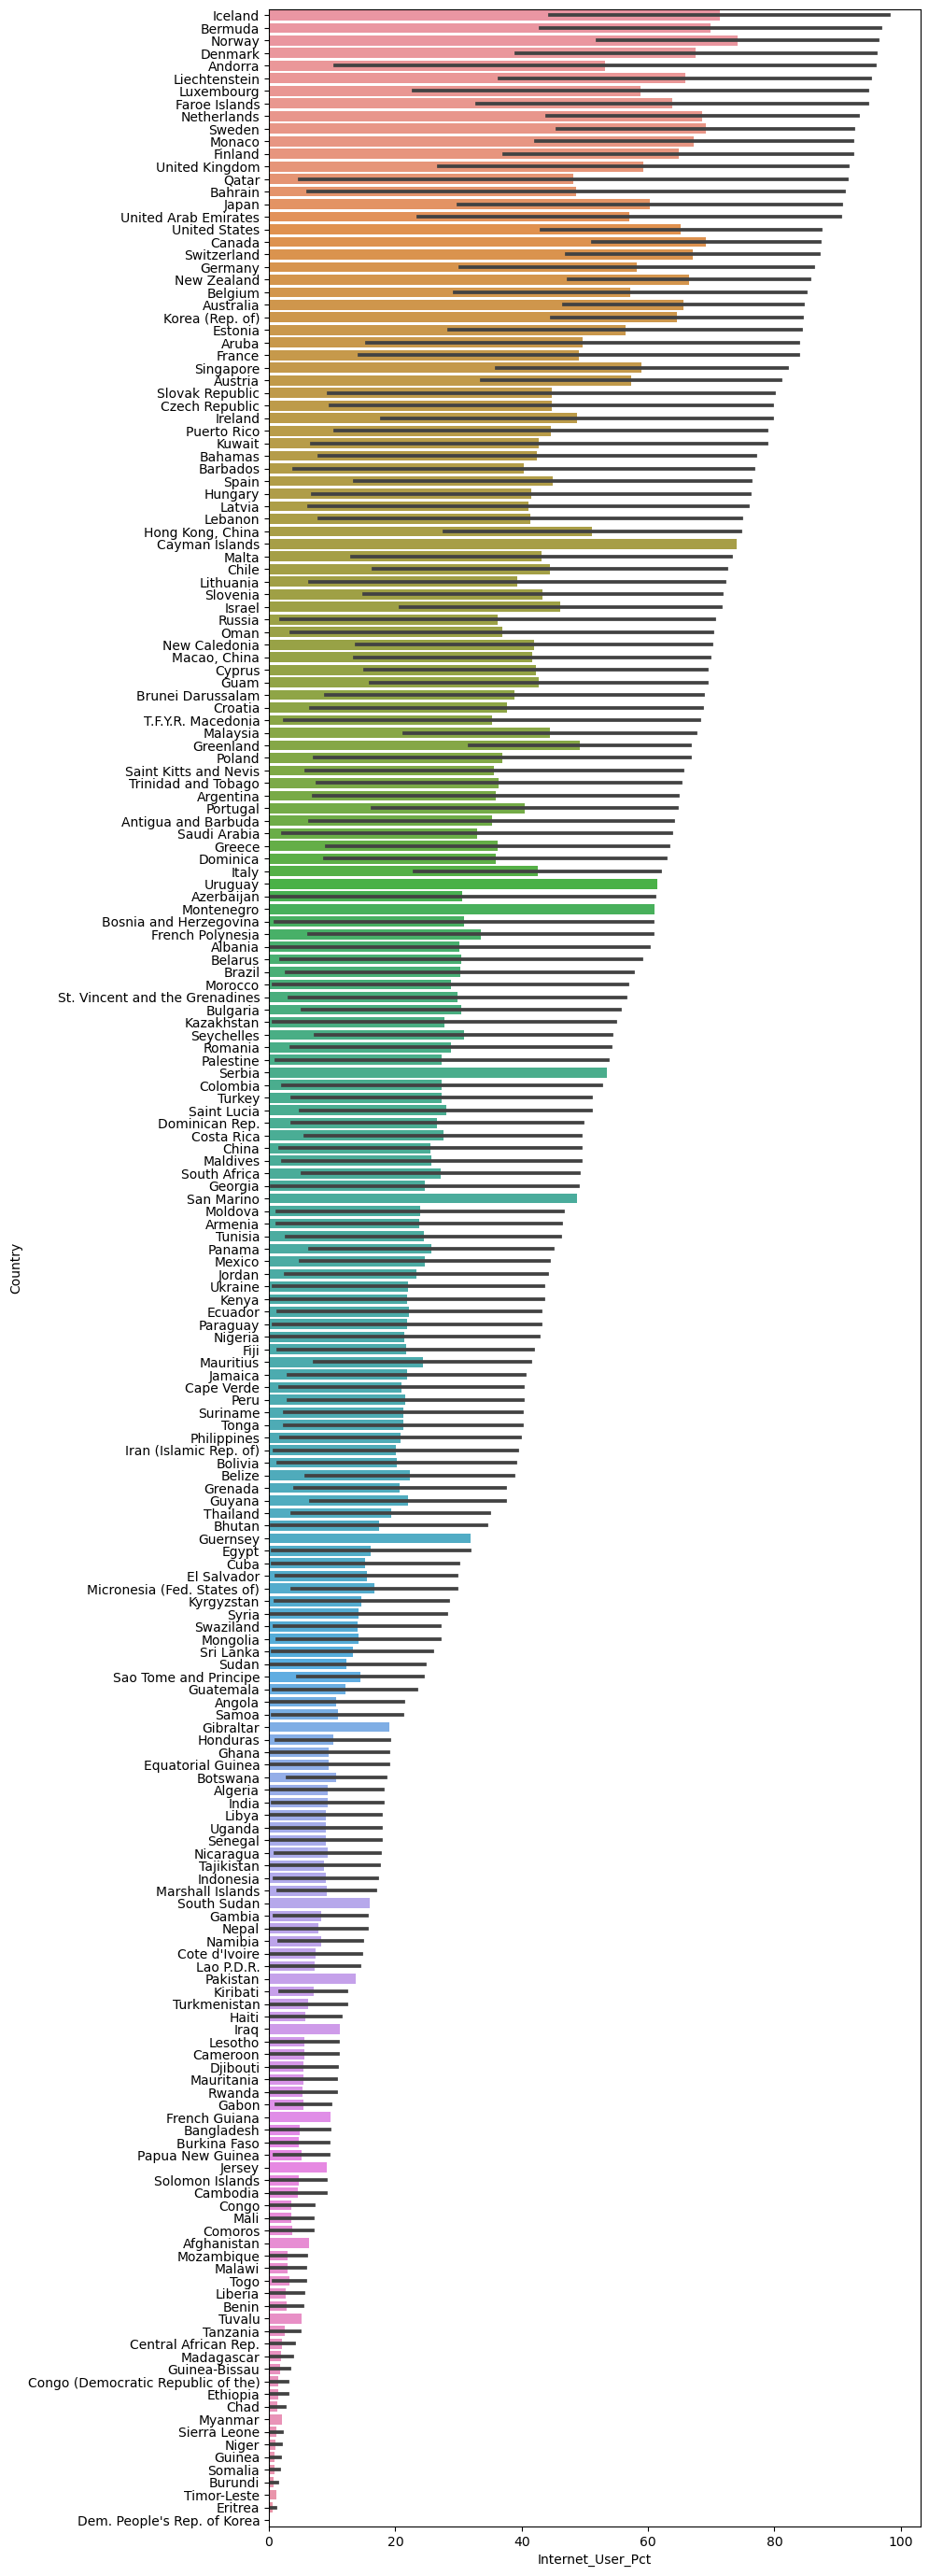

In [56]:
fig = plt.figure(figsize = (9,35))
ax1 = plt.subplot (111)
zerofourteen_years = zerofourteen_years.sort_values(['Internet_User_Pct'], ascending=False).reset_index(drop=True)
sns.barplot( x=zerofourteen_years["Internet_User_Pct"], y=zerofourteen_years["Country"] )
plt.title()

Text(0.5, 1.0, 'Usage in 2000')

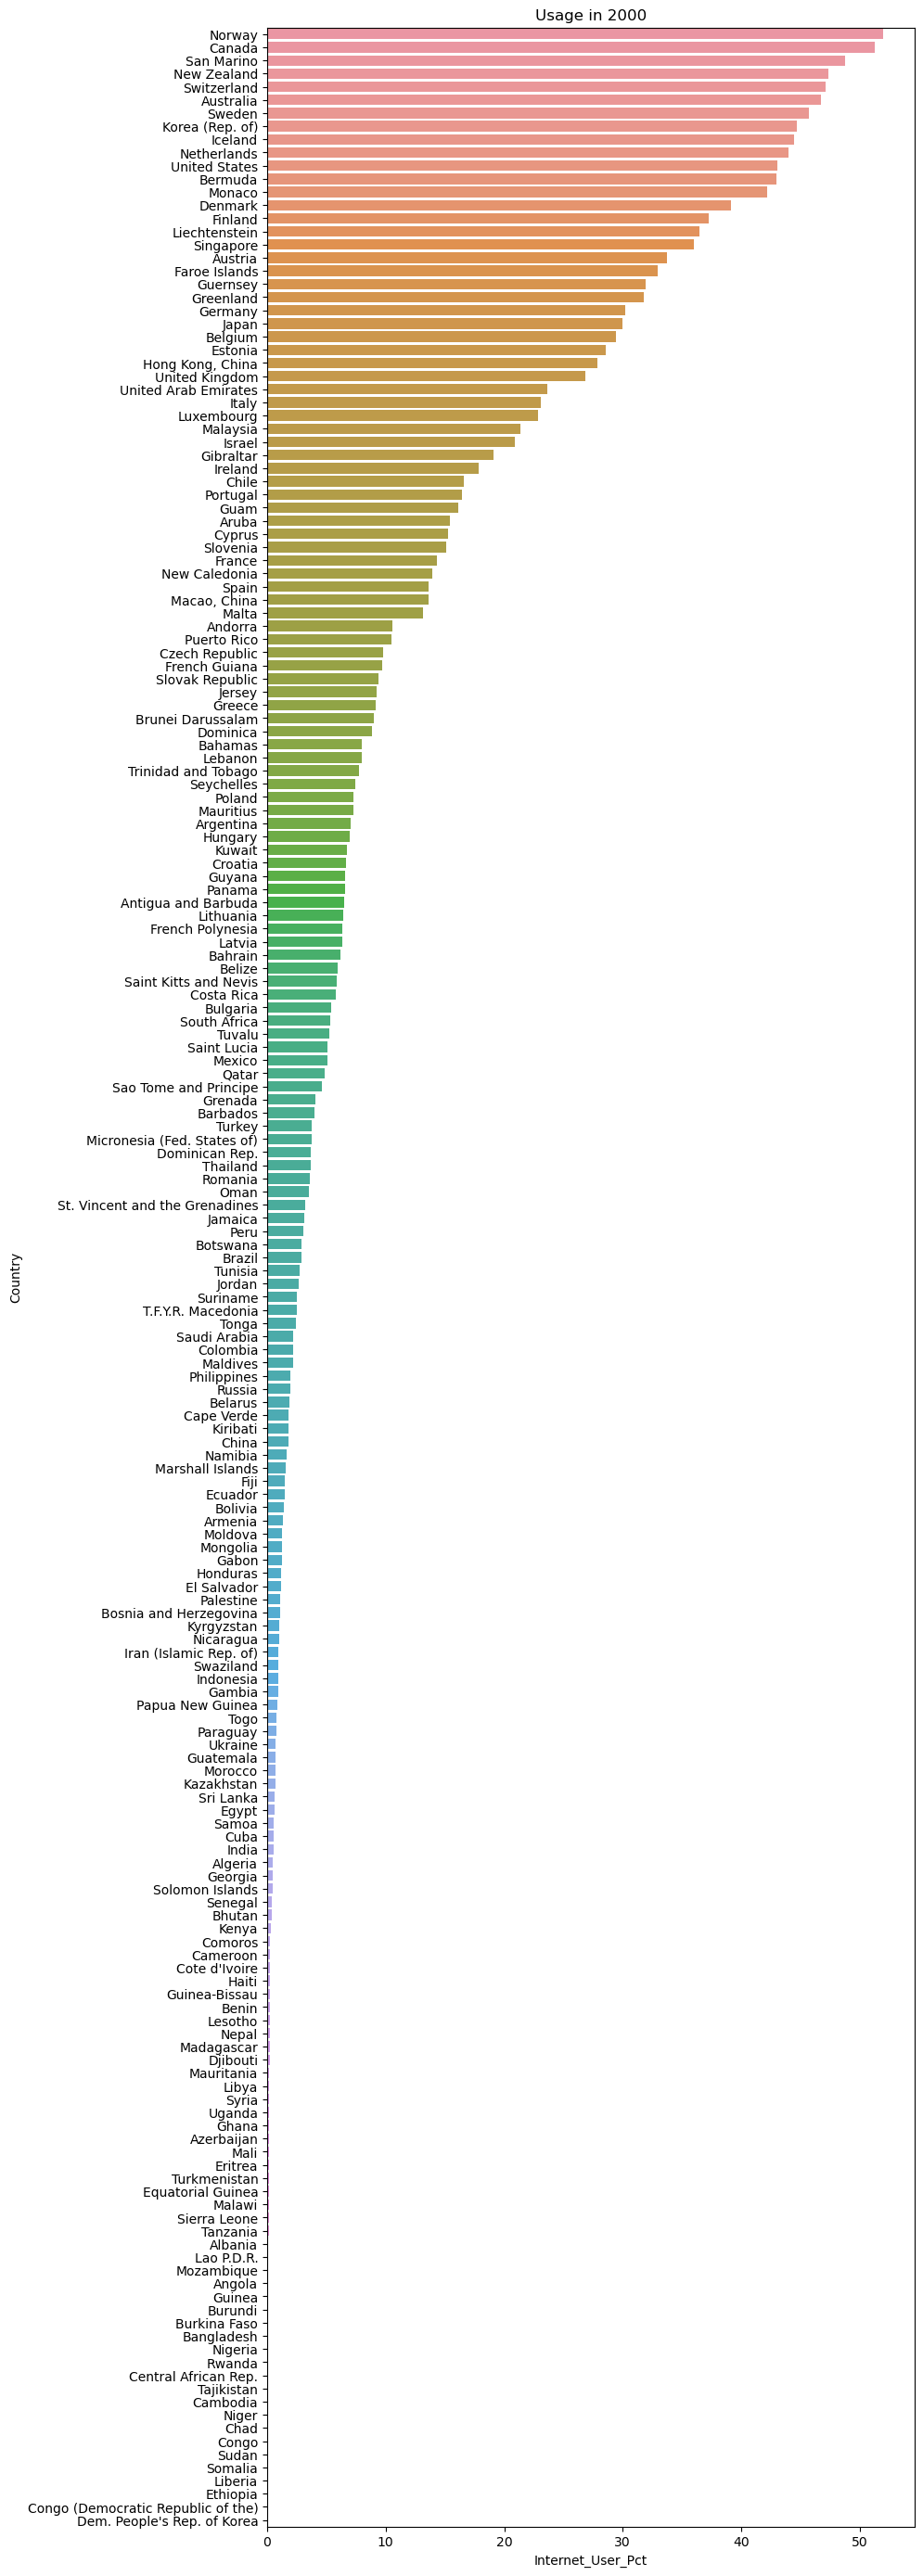

In [65]:
fig = plt.figure(figsize = (9,35))
ax1 = plt.subplot (111)
zero_years = zero_years.sort_values(['Internet_User_Pct'], ascending=False).reset_index(drop=True)
sns.barplot( x=zero_years["Internet_User_Pct"], y=zero_years["Country"] )
plt.title('Usage in 2000')

Text(0.5, 1.0, 'Usage in 2014')

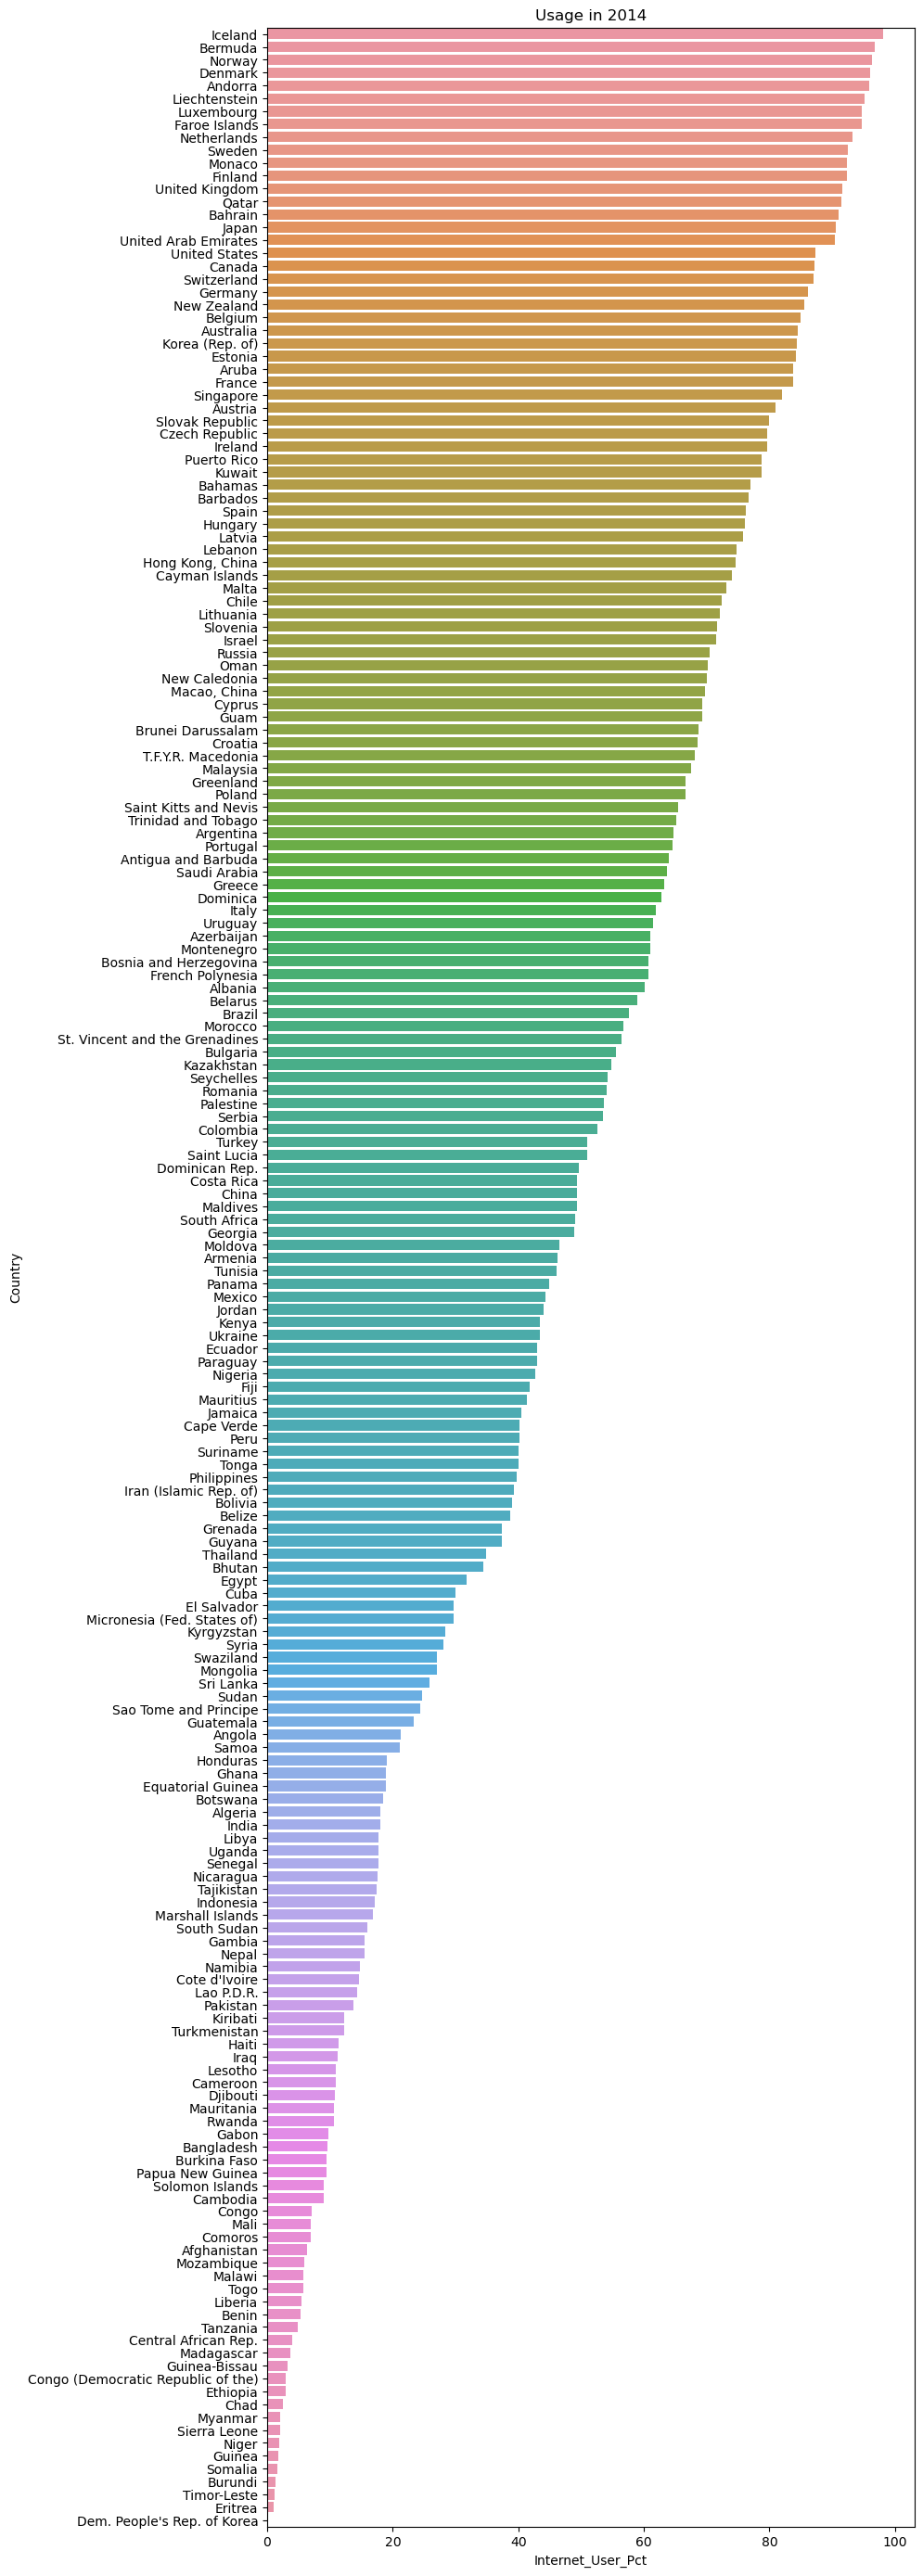

In [62]:
fig = plt.figure(figsize = (9,35))
ax1 = plt.subplot (111)
fourteen_years = fourteen_years.sort_values(['Internet_User_Pct'], ascending=False).reset_index(drop=True)
sns.barplot( x=fourteen_years["Internet_User_Pct"], y=fourteen_years["Country"] )
plt.title('Usage in 2014')

19. For how many countries was the percentage of internet users below 5% in 2014? 16 countries had low usage below 5%. 

In [67]:
fourteen_years

,Country,Year,Internet_User_Pct
0,Iceland,2014,98.16
1,Bermuda,2014,96.80
2,Norway,2014,96.30
3,Denmark,2014,95.99
4,Andorra,2014,95.90
...,...,...,...
189,Somalia,2014,1.63
190,Burundi,2014,1.38
191,Timor-Leste,2014,1.14
192,Eritrea,2014,0.99


In [70]:
low_usage = fourteen_years[fourteen_years['Internet_User_Pct'] < 5]

In [73]:
low_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 178 to 193
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            16 non-null     object 
 1   Year               16 non-null     object 
 2   Internet_User_Pct  16 non-null     float64
dtypes: float64(1), object(2)
memory usage: 512.0+ bytes


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [74]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [75]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


In [76]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [77]:
gdp_demo = gdp_df.drop(columns = ['Value Footnotes'])

In [78]:
gdp_demo

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [83]:
gdp_demo.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [84]:
gdp_demo

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [85]:
internet_demo

,Country,Year,Internet_User_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4310,Uruguay,2006,29.400000
4311,Uruguay,2005,20.088190
4312,Uruguay,2004,17.063098
4313,Uruguay,2003,15.937137


In [88]:
df1=pd.concat([gdp_demo, internet_demo], ignore_index = True, sort = False)

In [92]:
df1

,Country,Year,GDP_Per_Capita,Internet_User_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
11486,Uruguay,2006,NaN,29.400000
11487,Uruguay,2005,NaN,20.088190
11488,Uruguay,2004,NaN,17.063098
11489,Uruguay,2003,NaN,15.937137


In [93]:
gdp_and_internet_use = df1

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [94]:
is_2014 =  gdp_and_internet_use['Year'] == '2014'

In [95]:
four_demo = gdp_and_internet_use[is_2014]

In [99]:
four_demo.sort_values(by = 'Internet_User_Pct', ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Internet_User_Pct
9042,Iceland,2014,NaN,98.16
7591,Bermuda,2014,NaN,96.80
10192,Norway,2014,NaN,96.30


In [101]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_User_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
11486,Uruguay,2006,NaN,29.400000
11487,Uruguay,2005,NaN,20.088190
11488,Uruguay,2004,NaN,17.063098
11489,Uruguay,2003,NaN,15.937137


In [102]:
gdp_and_internet_use.Country.unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czech Republic',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high inco

In [103]:
gdp_and_int_list = ['Iceland', 'Bermuda', 'Norway']

In [104]:
top_three = gdp_and_internet_use[gdp_and_internet_use.Country.isin(gdp_and_int_list)]

In [105]:
top_three

,Country,Year,GDP_Per_Capita,Internet_User_Pct
639,Bermuda,2020,76105.138057,NaN
640,Bermuda,2019,81681.726668,NaN
641,Bermuda,2018,81423.408453,NaN
642,Bermuda,2017,81834.955874,NaN
643,Bermuda,2016,78149.352535,NaN
...,...,...,...,...
10212,Norway,1994,NaN,4.152450
10213,Norway,1993,NaN,2.783991
10214,Norway,1992,NaN,2.216366
10215,Norway,1991,NaN,1.407395


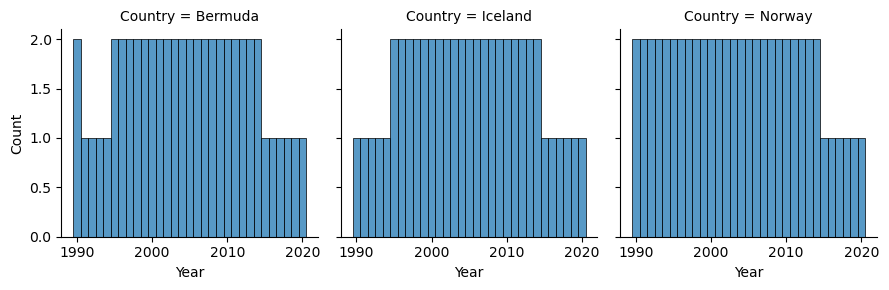

In [113]:
g = sns.FacetGrid(top_three, col="Country")
g.map_dataframe(sns.histplot, x="Year", )

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [106]:
four_demo

,Country,Year,GDP_Per_Capita,Internet_User_Pct
7176,Afghanistan,2014,NaN,6.39
7191,Albania,2014,NaN,60.10
7212,Algeria,2014,NaN,18.09
7235,Andorra,2014,NaN,95.90
7254,Angola,2014,NaN,21.26
...,...,...,...,...
11384,Ukraine,2014,NaN,43.40
11407,United Arab Emirates,2014,NaN,90.40
11428,United Kingdom,2014,NaN,91.61
11453,United States,2014,NaN,87.36


24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?